49.46433812046092 23.73481215506183
[ 31.30068716  30.87650297  30.44985752  30.02072317  29.58907181
  29.15487483  28.71810313  28.27872708  27.83671651  27.39204072
  26.94466846  26.4945679   26.04170662  25.58605161  25.12756924
  24.66622526  24.20198475  23.73481216  23.26467122  22.791525
  22.31533583  21.8360653   21.35367428  20.86812281  20.37937018
  19.88737483  19.39209438  18.89348557  18.39150426  17.88610539
  17.37724295  16.86486999  16.34893854  15.82939962  15.30620319
  14.77929811  14.24863216  13.71415193  13.17580284  12.6335291
  12.08727363  11.53697808  10.98258275  10.42402655   9.86124697
   9.29418004   8.72276025   8.14692054   7.56659222   6.98170493
   6.39218655   5.79796323   5.19895921   4.59509687   3.98629657
   3.37247663   2.75355328   2.12944048   1.50004999   0.86529116
   0.22507091  -0.42070637  -1.07213894  -1.72932779  -2.39237674
  -3.06139256  -3.7364851   -4.41776738  -5.10535569  -5.79936986
  -6.49993323  -7.20717291  -7.92121987  -8

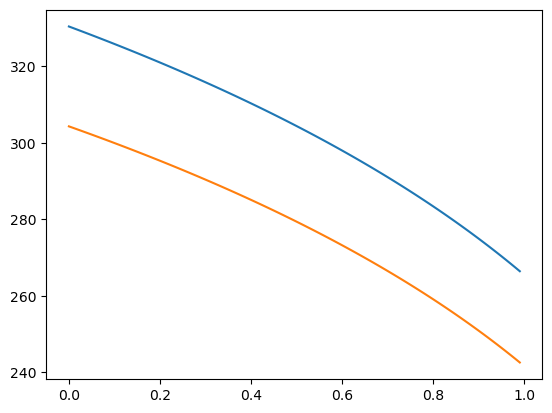

In [5]:
from scipy.optimize import fsolve
import math
import numpy as np
import matplotlib.pyplot as plt

alpha = 3
beta = 4
eps_A = 0.875
r_SM = 0.1065
sigma = 5.67*10**-8
P_S_0 = 341.3
r_SE = 0.17
a_O3 = 0.08
a_SW = 0.1451
a_LW = 0.8258
f_A = 0.618

def temperature(p):
    T_A, T_E = p

    P_1 = (1-a_O3)*P_S_0
    P_2 = (1-r_SM)*P_1
    P_2_r = r_SM*P_1

    P_3 = (1-a_SW)/(1-(1-a_SW)**2*r_SE*r_SM)*P_2#(1-a_SW)*(P_2+P_6_r)
    P_4 = (1-r_SE)*P_3
    P_4_r = r_SE*P_3
    P_5 = (1-a_SW)*P_4_r
    P_6 = (1-r_SM)*P_5
    P_6_r = r_SM*P_5
    P_7 = (1-a_O3)*(P_6+P_2_r)

    

    return (sigma*T_E**4 - beta*(T_A-T_E) - alpha*(T_A - T_E) -P_4-(1-a_LW)*f_A*eps_A*sigma*T_A**4, eps_A*sigma*T_A**4+(beta+alpha)*(T_A-T_E)-a_LW*sigma*T_E**4 -a_LW*f_A*eps_A*sigma*T_A**4- a_O3*(P_6+P_2_r+P_S_0)-a_SW*(P_4_r+P_2+P_6_r))


x, y =  fsolve(temperature, (273, 273))

print(x-273, y-273)
N = 100
T_A_array = np.zeros(N)
T_E_array = np.zeros(N)
r_SE_array = np.zeros(N)

x,y = (273,273)

for i in range(N):
    r_SE_array[i] = i/N
    r_SE = r_SE_array[i]
    
    T_A_array[i],T_E_array[i] = fsolve(temperature,(x,y))
print(T_E_array-273)

plt.plot(r_SE_array,T_A_array)
plt.plot(r_SE_array,T_E_array)
plt.show()
